<a href="https://colab.research.google.com/github/hyeonjun/Python_ML_Complete_Guide/blob/main/02_Scikit_Learn/Scikit_Learn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

데이터 처리 기본 사항

1. 결손값(NaN, Null)은 허용되지 않는다. 이러한 결손값은 고정된 다른 값으로 변환해야 한다. 피처 값 중 Null 값이 얼마 되지 않으면 피처의 평균값 등으로 대체 할 수 있다. Null이 대부분이라면 해당 피처를 드롭하는 것이 좋다. 가장 결정이 힘든 경우는 Null 값이 일정 수준 이상(정확한 수치를 나타낼 수 없음)이 되는 경우다. 해당 피처의 중요도에 따라 상세히 검토하여 정밀한 대체 값을 선정해야한다.

사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않는다. 그래서 문자열 값은 인코딩돼서 숫자형으로 변환해야 한다. 문자열 피처는 일반적으로 카테고리형 피처와 텍스트형 피처를 의미한다.

카테고리형 피처는 코드값으로 표현하는 것이 더 이해하기 쉽다. 텍스트 피처는 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나 불필요한 피처면 삭제하는 것이 좋다.

식별자 피처의 경우 단순히 데이터 로우를 식별하는 용도로 사용되기 때문에 중요한 요소가 될 수 없으므로 인코딩하지 않고 삭제하는 것이 좋다.


# 데이터 인코딩

머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Label encoding)과 원-핫 인코딩(One Hot encoding)이 있다.


**레이블 인코딩(Label encoding)**

: 카테고리 피처를 코드형 숫자값으로 변환하는 것

예) 상품 구분이 TV, 냉장고, 전자레인지, 컴퓨터 등으로 있을 경우

TV : 1, 냉장고 : 2, 전자레인지 : 3, 컴퓨터 : 4 ... 같은 숫자형으로 변환

In [1]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 :',labels)

인코딩 변환값 : [0 1 4 5 3 3 2 2]


In [2]:
# 문자열 값이 어떤 숫자값으로 인코딩됐는지 LabelEncoder 객체의 classes_ 속성값으로 확인
print('인코딩 클래스 :',encoder.classes_)

인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [3]:
# inverse_transform()을 통해 인코딩된 값을 다시 디코딩할 수 있다.
print('디코딩 원본값 :',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값 : ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


**원-핫 인코딩(One-Hot Encoding)**

피처 값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식.

행 형태로 되어 있는 피처의 고유 값을 열 형태로 차원 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [5]:
# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [6]:
import pandas as pd
oh_df = pd.DataFrame(oh_labels.toarray(), index=items ,columns=encoder.classes_)
oh_df

,TV,냉장고,믹서,선풍기,전자렌지,컴퓨터
TV,1.0,0.0,0.0,0.0,0.0,0.0
냉장고,0.0,1.0,0.0,0.0,0.0,0.0
전자렌지,0.0,0.0,0.0,0.0,1.0,0.0
컴퓨터,0.0,0.0,0.0,0.0,0.0,1.0
선풍기,0.0,0.0,0.0,1.0,0.0,0.0
선풍기,0.0,0.0,0.0,1.0,0.0,0.0
믹서,0.0,0.0,1.0,0.0,0.0,0.0
믹서,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# 피처 스케일링과 정규화

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 한다. 대표적인 방법으로는 표준화(Standardization)와 정규화(Normalization)가 있다.

표준화는 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미한다. 표준화를 통해 변환될 피처 x에 대해 새로운 i번째 데이터를 xi_new라고 하면 이 값은 원래 값에서 피처 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값으로 계산할 수 있다.

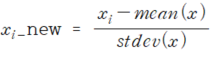

일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다. 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것이다.

새로운 데이터 xi_new는 원래 값에서 피처 x의 최소값을 뺀 값을 피처 x의 최대값과 최소값의 차이로 나눈 값으로 변환할 수 있다.

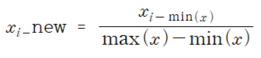

사이킷런의 Normalizer 모듈과 일반적인 정규화는 차이가 있다. 사이킷런의 Nomalizer 모듈은 선형대수에서의 정규화 개념이 적용되었으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미.

개별 벡터를 모든 피처 벡터의 크기로 나눈다. 세 개의 피처 x, y, z 가 있다고 할 때 새로운 데이터 xi_new는 원래 값에서 세 개의 피처의 i번체 피처 값에 해당하는 크기를 합한 값으로 나눈 값이다.

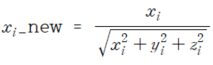

사이킷런에서 제공하는 대표적인 피처 스캐일링 클래스인 StandardScaler와 MinMaxScaler를 알아보자.

# StandardScaler

개별 피처를 평균이 0이고, 분산이 1인 값으로 변환.

사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신(Support Vector Machine)이나 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되었기 때문에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다.

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [9]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 컬럼 값의 평균이 0에 가까운, 분산은 1에 가까운 값으로 변환되었다.

# MinMaxScaler

MinMaxScaler는 데이터값을 0과 1사이의 범위값으로 변환한다(음수값이 있으면 -1에서 1값으로 변환). 데이터 분포가 가우시간 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수  있다.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 최소값')
print(iris_df_scaled.min())
print('feature 들의 최대값')
print(iris_df_scaled.max())

feature 들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature 들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1사이의 값으로 변환되는 스케일링 적용됐음을 알 수 있다.

#### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용한다.

일반적으로 fit()은 데이터 변환을 위한 기준 정보 설정(예를 들어 데이터 세트의 최대값/최소값 설정)을 적용하며 transform()은 이렇게 설정된 정보를 이용해 데이터를 변환한다. 그리고 fit_transform()은 fit()과 transform()을 한번에 적용하는 기능을 수행한다.

---

<br/>

**학습 데이터와 테스트 데이터에 fit()과 transform() 적용 시 주의사항**

Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야한다.

즉, 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못한다.

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이트 세트로 생성
# Saler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0,6).reshape(-1, 1)

# MinMaxScaler 객체에 별도의 feature_ragne 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit() 하게 되면 train_array 데이터의 최솟값이 0이, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10->1 로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 :',np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터 :',np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [12]:
# 테스트 데이터 세트를 변환하는데, fit()을 호출하여 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터 :',np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터 :',np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터 : [0 1 2 3 4 5]
Scale된 test_array 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


test_array의 Scale된 결과값을 보면 train_array의 Scale된 결과값과 맞지 않다. 테스트 데이터의 경우는 최소값 0, 최대값 5이므로 1/5로 스케일링된다.

즉, 테스트 데이터의 1의 스케일링 변환으로 0.2가 되었는데 학습 데이터의 경우 1이 0.1이므로 데이터 값이 맞지 않다.

따라서 테스트 데이터에 fit()을 적용해선 안되고 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용하여 tranform()으로 변환해야 한다.

In [13]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터 :',np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터 :',np.round(train_scaled.reshape(-1), 2))

test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터 :',np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터 :',np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터 : [0 1 2 3 4 5]
Scale된 test_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]


fit_transform()을 적용할 때도 마찬가지다. fit_transform()은 fit()과 transform()을 순차적으로 수행하는 메소드이므로 학습 데이터에서는 사용할 수 있지만, 테스트 데이터에서는 절대 사용하면 안된다.

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1번이 안된다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용하여 transform()으로 변환

# 사이킷런으로 수행하는 타이타닉 생존자 예측

* Passengerid : 탑승자 데이터 일련번호

* survived : 생존 여부, 0 = 사망, 1 = 생존

* pclass : 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석

* sex : 탑승자 성별

* name : 탑승자 이름

* Age : 탑승자 나이

* sibsp : 같이 탑승한 형제자매 또는 배우자 인원수

* parch : 같이 탑승한 부모님 또는 어린이 인원수

* ticket : 티켓 번호

* fare : 요금

* cabin : 선실 번호

* embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_완벽가이드/02_Scikit_Learn/titanic_train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
print('\n ### 학습 데이터 정도 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정도 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


RangeIndex : DataFrame 인덱스의 범위, 891개의 로우

칼럼 수는 12개

2개의 칼럼이 float64 타입, 5개의 칼럼이 int64 타입, 5개의 칼럼이 object 타입.

Age, Cabin, Embarked 칼럼은 각각 714개, 204개, 889개의 Not Null 값을 가지고 있으므로 각각 177개, 608개, 2개의 Null값(NaN)을 가지고 있다.



In [16]:
# Null값에 대해 Age의 경우 평균 나이, 나머지 칼럼은 'N'으로 변경
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수')
print(titanic_df.isnull().sum())

데이터 세트 Null 값 개수
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [17]:
# 남아있는 문자열 피처인 Sex, Cabin, Embarked의 값 분류
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 :
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
              ... 
C106             1
D50              1
D46              1
C111             1
D9               1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin(선실)의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리 되지 않았다. 예를 들어 'C23 C25 C27'과 같이 여러 Cabin이 한꺼번에 표시된 것이 4건이 된다. Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보인다.

In [18]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

먼저 어떤 유형의 승객이 생존 확률이 높았는지 확인해봐야한다.

In [19]:
# 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해보자.
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

남성보다 여성이 훨씬 더 높은 확률도 생존했다.

Seaborn 패키지를 사용하여 데이터의 시각화를 해보자

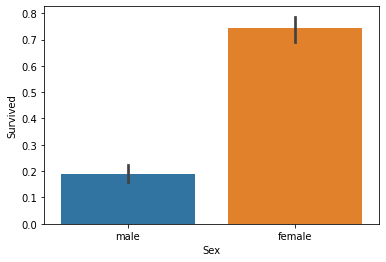

In [20]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

부자와 가난한 사람 간의 생존 확률에 대해서 확인해보자. 부를 측정할 수 있는 속성으로 적당한 것은 객실 등급일 것이다. 일등실, 이등실, 마지막으로 삼등실에 따라 생존 확률을 살펴보자.

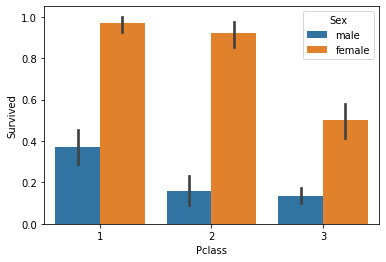

In [21]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

여성의 경우 일, 이등실에 따른 생존 확률 차이는 크지않지만, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어진다.

남성의 경우 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높다.

이번에는 나이에 다른 생존확률을 확인해보자.

나이의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당하자.

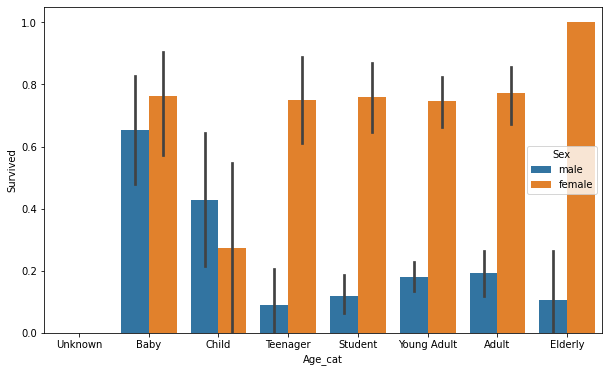

In [22]:
# age에 따른 구분값을 반환하는 함수 설정.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

Sex, Age, Pclass 등이 중요하게 생존을 좌우하는 피처임을 어느 정도 확인할 수 있었다.

이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환해보자. 인코딩은 사이킷런의 LabelEncoder 클래스를 이용하여 레이블 인코딩을 적용한다. LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수-1)까지의 숫자 값으로 변환한다.

In [23]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for f in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[f])
        dataDF[f] = le.transform(dataDF[f])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [24]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

데이터 전처리를 수행하는 transform_features() 함수를 만들었다. 이 함수를 이용해 다시 원본 데이터를 가공해보자. 원본 CSV 파일을 다시 로딩하고 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만들자. 

In [25]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_완벽가이드/02_Scikit_Learn/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

내려받은 학습 데이터 세트를 기반으로 해서 train_test_split() API를 이용하여 별도의 테스트 데이터 세트를 추출한다.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타내고 있다. 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없다.

이번에는 교차 검증을 위한 사이킷런 model_selection 패키지의 KFold 클래스, cross_val_score(), GridSearchCV 클래스를 사용한다.

In [28]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))

In [29]:
# exec_kfold 호출
print('### DecisionTreeClassifier ###')
exec_kfold(dt_clf, folds=5)

### DecisionTreeClassifier ###
교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


이번에는 교차 검증을 cross_val_score() API를 이용해 수행 - StratifiedKFold

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


마지막으로 GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정해보자. CV는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능을 측정한다. 최적 하이퍼 파라미터와 그때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 예측 수행.

In [31]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


# 정리

#### 머신러닝 애플리케이션 순서

1. 데이터 가공 및 변환 과정의 전처리 작업

2. 데이터를 학습 데이터와 테스트 데이터로 데이터 세트 분리 작업

3. 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습

4. 학습된 모델을 기반으로 테스트 데이터에 대한 예측 수행

5. 예측된 결과값을 실제 결과값과 비교해 모델에 대한 평가 수행

<br/>

#### 데이터 전처리 작업

1. 오류 데이터의 보정이나 결손값(Null) 처리 등의 다양한 데이터 클렌징 작업

        DataFrame['칼럼명'].fillna(데이터, inplace=True/False)
        titanic_df.isnull().sum() # 데이터 세트 Null 값 개수 확인

2. 레이블 인코딩이나 원-핫 인코딩과 같은 인코딩 작업

        from sklearn.preprocessing import LabelEncoder
        from sklearn.preprocessing import OneHotEncoder

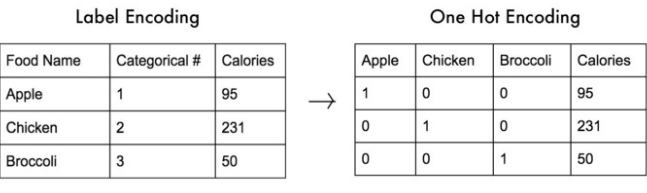

3. 데이터의 스케일링/정규화 작업

        from sklearn.preprocessing import StandardScaler
        from sklearn.preprocessing import MinMaxScaler

StandardScaler : 개별 피처(칼럼 값)를 평균이 0에, 분산이 1에 가장 가까운 수치로 변환

MinMaxScaler : 데이터 값을 0과 1사이의 범위값으로 변환(음수값이 있으면 -1 ~ 1 값)

<br/>

머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가해야 한다. 또한 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과 평가는 해당 테스트 데이트 세트에만 치우친 빈약한 머신러닝 모델이 만들어질 가능성이 높다.

이를 해결하기 위해 학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리형 교차 검증을 수행할 수 있다.

<br/>

사이킷런은 교차 검증을 지원하기 위해 KFold, StratifiedKFold, cross_val_score() 등의 다양한 클래스와 함수를 제공. 또한 머신러닝 모델의 최적의 하이퍼 파라미터를 교차 검증을 통해 추출하기 위해 GridSearchCV를 제공한다.